## **DATASET Fashion MNIST**
[Enlace al dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_test.csv)

Fashion MNIST es un conjunto de datos que contiene imágenes de artículos de ropa en escala de grises. Contiene 60000 imagenes para entrenamiento y 10000 imagenes para el testing. Cada imagen es de 28 x 28 pixeles. Las imagenes estan en escala de grises, por lo que cada pixel tiene un valor entre 0 y 255.

Las imágenes están aplanadas en una sola fila en los archivos CSV.
Esto significa que cada imagen de 28x28 se convierte en un vector de 784 (28*28) características.

Cada imagen en el dataset tiene una etiqueta que representa la clase de ropa a la que pertenece.
Hay 10 categorías diferentes de ropa, cada una etiquetada con un número entero del 0 al 9.

* 0	T-shirt/top (Camiseta/top)
* 1	Trouser (Pantalón)
* 2	Pullover (Jersey)
* 3	Dress (Vestido)
* 4	Coat (Abrigo)
* 5	Sandal (Sandalia)
* 6	Shirt (Camisa)
* 7	Sneaker (Zapatilla)
* 8	Bag (Bolso)
* 9	Ankle boot (Bota de tobillo)

Primera columna: Contiene la etiqueta (de 0 a 9) que representa la clase de la imagen.

Restantes 784 columnas: Contienen los valores de los píxeles de la imagen aplanada en escala de grises (28x28). Cada valor de píxel es un número entero entre 0 (negro) y 255 (blanco).

# Clasificación multiclase

## Introduction

En este ejercicio se implementa la regresion one-vs-all y una red neuronal para reconocimiento de digitos.

Antes de empezar la ejecución de las partes de codigo correspondienters a los ejercicios, se requiere importar todas las librerias necesarias.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

import pandas as pd

# Libreria para graficos
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

`input_layer_size = 784:`

Cada imagen contiene una matriz de tamaño 28x28, donde cada celda (o píxel) tiene un valor que representa la intensidad de color (generalmente en escala de grises, con valores que van de 0 a 255). Define el número de características que el modelo usará como input. En este caso, cada imagen, después de ser aplanada, se representa como un vector de 784 características (píxeles).

`num_labels = 10:`

Este parámetro indica que el problema de clasificación tiene 10 clases diferentes (etiquetas), que van del 0 al 9.

In [ ]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Dataset', 'ex3data1.mat'))

# Leer el archivo CSV usando pandas
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/one vs all/fashion-mnist_train.csv'
df = pd.read_csv(file_path)

# Separar las características (X) y los labels (Y)
X = df.iloc[:, 1:].values  # Todas las columnas excepto la primera
Y = df.iloc[:, 0].values   # Solo la primera columna (label)
m = Y.size

# Normalizar los datos
X = X / 255.0  # Suponiendo que los valores de los píxeles están en el rango de 0 a 255

# Confirmar las dimensiones de X e Y
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de Y: {Y.shape}")


Dimensiones de X: (60000, 784)
Dimensiones de Y: (60000,)


### 1.2 Visualización de los datos

La función displayData está diseñada para visualizar un conjunto de datos de imágenes almacenadas en una matriz X. Las imágenes se muestran en una cuadrícula en un gráfico utilizando la biblioteca matplotlib

**1. Definicion de la Funcion**
* X: Una matriz de numpy que contiene los datos de las imágenes. Cada fila de X representa una imagen aplanada (es decir, un vector de píxeles).

* example_width: El ancho de cada imagen. Si no se proporciona, se calcula automáticamente.

* figsize: El tamaño de la figura de la cuadrícula en la que se mostrarán las imágenes. Por defecto es (5, 5).

**2. Cálculo de Filas y Columnas de la Entrada X**

```
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensional.')
```

* X.ndim: Indica la cantidad de dimensiones de la matriz X.

* Si X es una matriz bidimensional (ndim == 2), se obtienen m (número de imágenes) y n (número de píxeles por imagen).

* Si X es un vector unidimensional (ndim == 1), significa que solo hay una imagen, así que se ajusta para tener 1 fila (m = 1) y n será el tamaño del vector.

* Si X no es ni 1D ni 2D, se lanza un error de índice.

**3. Calculo de Dimensiones de la Imagen**

```
    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width
```
* example_width: Establece el ancho de cada imagen. Si no se proporciona example_width, se asume que las imágenes son cuadradas y se calcula como la raíz cuadrada de n (el número de píxeles por imagen).

* example_height: Calcula la altura de cada imagen basándose en el número total de píxeles (n) y el example_width.

**4. Cálculo del Número de Filas y Columnas para Mostrar las Imágenes**

```
    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
```
* display_rows: Calcula el número de filas en la cuadrícula de visualización como la raíz cuadrada del número total de imágenes (m).

* display_cols: Calcula el número de columnas necesarias para mostrar todas las imágenes, asegurándose de que todas las imágenes tengan un espacio adecuado en la cuadrícula.

**5. Creación de la cuadricula de visualizacion**

```
    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)
```
* pyplot.subplots: Crea una figura (fig) y una serie de subgráficos (ax_array) para mostrar las imágenes en una cuadrícula de tamaño display_rows x display_cols.

* fig.subplots_adjust: Ajusta el espacio entre los subgráficos (wspace y hspace) para que estén más cerca unos de otros.

**6. Mostrar imagenes en la cuadricula**
```
     ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        if i < m:  # Asegura que no intente dibujar más imágenes de las que existen
            ax.imshow(X[i].reshape(example_width, example_width),  # Sin 'order' especificado
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

```
for i, ax in enumerate(ax_array): Recorre cada subgráfico en ax_array.
* ax.imshow: Muestra la imagen i en la subtrama ax. La función reshape reorganiza el vector unidimensional de píxeles en una matriz de tamaño example_width x example_width para que se muestre como una imagen cuadrada.
* cmap='Greys': Utiliza un mapa de colores en escala de grises.
* ax.axis('off'): Desactiva los ejes para que no se muestren las líneas y números de los ejes.

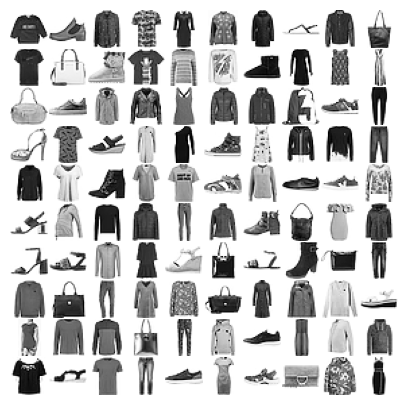

In [ ]:
def displayData(X, example_width=None, figsize=(5, 5)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        if i < m:  # Asegura que no intente dibujar más imágenes de las que existen
            ax.imshow(X[i].reshape(example_width, example_width),  # Sin 'order' especificado
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

# Visualiza solo un subconjunto pequeño de imágenes
subset_X = X[:100]  # Cambia el número a la cantidad de imágenes que quieras ver
displayData(subset_X)

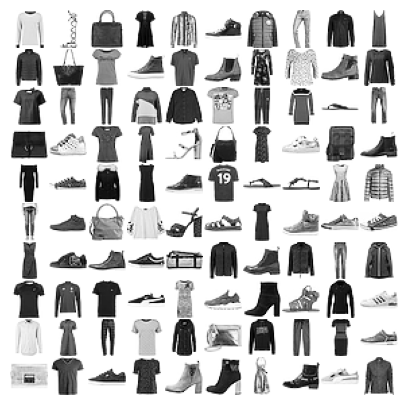

In [ ]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

### **La función sigmoide**
Se utiliza para "comprimir" cualquier número real a un rango entre 0 y 1, haciendo que sea útil para modelar probabilidades. Dada su forma en "S" o curva logística, la función sigmoide toma valores reales y los transforma en una salida que puede interpretarse como una probabilidad.

In [ ]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

### **Función de costo**

***Costo (J):*** Una medida de qué tan bien el modelo actual (definido por theta) se ajusta a los datos. La función de costo ayuda a guiar el entrenamiento del modelo ajustando los valores de theta para minimizar este costo.

***Gradiente (grad):*** El gradiente del costo con respecto a cada parámetro en theta. Esto se utiliza para actualizar los parámetros durante el proceso de optimización (por ejemplo, utilizando el algoritmo de descenso de gradiente).

***Parámetros***

* `theta`: Un array numpy que contiene los parámetros actuales de la regresión logística. Es un vector de tamaño n, donde n es el número de características (incluyendo el término de intercepción o "bias").

* `X`: El conjunto de datos de entrada, una matriz m x n donde m es el número de ejemplos y n es el número de características (incluyendo la intercepción).

* `y`: Las etiquetas o valores de salida esperados. Es un vector de tamaño m, donde cada valor es la etiqueta correspondiente a un ejemplo en X.

* `lambda_`: Parámetro de regularización. Un escalar que controla la magnitud de la penalización por tener pesos grandes, ayudando a prevenir el sobreajuste.

**IMPLEMENTACION DE LA FUNCIÓN**

**1. Inicializacion de Variables Útiles**
* `m`: Número de ejemplos de entrenamiento. Se obtiene del tamaño de y.

**2. Inicializacion de la funcion de Costo y el Gradiente**

* Inicializa el costo J como 0 y el gradiente grad como un vector de ceros del mismo tamaño que theta. Esto es para asegurar que tengan los valores correctos antes de los cálculos.

**3. Calculo de la Hipotesis**

```
h = sigmoid(X.dot(theta.T))
```

* `X.dot(theta.T)`: Calcula el producto punto de la matriz de entrada X con el vector theta. Esto resulta en un vector de tamaño m, donde cada entrada representa el valor lineal predicho para un ejemplo.

* `sigmoid(...)`: Aplica la función sigmoide a cada valor del producto punto para obtener la probabilidad estimada de que la etiqueta sea 1 para cada ejemplo. h es, por lo tanto, un vector de tamaño m con valores entre 0 y 1.

**4. Regularizacion de los parametros**

* `temp`: Crea una copia de theta para usarla en la regularización.
* `temp[0] = 0`: Establece el primer elemento de temp (el término de intercepción o "bias") a 0. Esto se hace porque no se debe regularizar el término de intercepción en la regresión logística.

**5. Calculo del costo regularizado**
* *Primera Parte (`(1 / m) * np.sum(...)`)*
  * Calcula la funcion de costo de la regresion logistica sin regularizacion
  * `-y.dot(np.log(h))`: Calcula el costo cuando la etiqueta y es 1.
  * `(1 - y).dot(np.log(1 - h))`: Calcula el costo cuando la etiqueta y es 0.
  * La suma total representa el costo promedio de todas las predicciones

* *Segunda Parte ((lambda_ / (2 * m)) * np.sum(np.square(temp)))*:
  * Agrega la penalización de regularización al costo.
  * Regulariza todos los elementos de theta excepto el término de intercepción (theta[0]).

**6. Calculo del gradiente regularizado**
* `(1 / m) * (h - y).dot(X)`: Calcula el gradiente de la función de costo sin regularización. Esto es la derivada de la función de costo con respecto a cada parámetro en theta.

* `(lambda_ / m) * temp`: Agrega el término de regularización al gradiente. Recuerda que temp[0] = 0, por lo que el término de intercepción no se regulariza.

**7. Retorno del costo y el gradiente**

In [ ]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # grad = (1 / m) * (h - y).dot(X)
    # grad = grad + (lambda_ / m) * temp

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad

<a id="section2"></a>
### 1.4 Clasificacion One-vs-all
En esta parte del ejercicio, se implementará la clasificación de uno contra todos mediante el entrenamiento de múltiples clasificadores de regresión logística regularizados, uno para cada una de las clases $K$ en nuestro conjunto de datos. En el conjunto de datos de dígitos escritos a mano, $K = 10$, pero su código debería funcionar para cualquier valor de $K$.

El argumento `y` de esta función es un vector de etiquetas de 0 a 9. Al entrenar el clasificador para la clase $k \in \{0, ..., K-1 \} $, querrá un vector K-dimensional de etiquetas $y$, donde $y_j \ in 0, 1$ indica si la instancia de entrenamiento $j ^ {th}$ pertenece a la clase $k$ $(y_j = 1)$, o si pertenece a una clase diferente $(y_j = 0)$.

Además, se utiliza `optimize.minimize` de scipy para este ejercicio.
<a id="oneVsAll"></a>

## **One vs All**

### Parametros
* `X`: Matriz de entrada de tamanio m x n
* `y`: Vector de etiquetas de tamanio (m) que contiene la clase correcta para cada ejemplo de entrenemiento
* `num_labels`: Entero que indica el numero total de clases posibles
* `lambda_`: Parametro de regularizacion que ayuda a prevenir el sobreajuste de los clasificadores

### Retorno
* `all_theta`: Matriz de tamaño (num_labels, n + 1). Cada fila corresponde a los parámetros entrenados para un clasificador de una clase particular.
* n + 1 se debe al término de intercepción que se agrega a cada conjunto de características.

### **IMPLEMENTACION**

**1. Inicializacion de variables utiles**

* `m y n`: Determina el número de ejemplos de entrenamiento (m) y el número de características (n).

* `all_theta`: Inicializa una matriz de ceros de tamaño (num_labels, n + 1). Esta matriz almacenará los parámetros entrenados (theta) para cada clase. Se usa n + 1 porque se agregará un término de intercepción a las características.

**2. Agrega el termino de intercepcion a `X`**

* `np.ones((m, 1))`: Crea una columna de unos de tamaño (m, 1), que representa el término de intercepción.

* `np.concatenate`: Combina esta columna de unos con la matriz X original. Esto da como resultado una matriz X extendida de tamaño (m, n + 1), donde la primera columna es el término de intercepción.

**3. Entrenamiento de los clasificadores de regresion logistica**
```
for c in np.arange(num_labels):
    initial_theta = np.zeros(n + 1)
    options = {'maxiter': 50}
    res = optimize.minimize(lrCostFunction,
                            initial_theta,
                            (X, (y == c), lambda_),
                            jac=True,
                            method='CG',
                            options=options)
    all_theta[c] = res.x
```
Este fragmento de código recorre todas las posibles etiquetas de clase (num_labels) y entrena un clasificador de regresión logística para cada una de ellas. La idea es que, para cada etiqueta de clase, el modelo aprenda a distinguir entre esa clase específica (positiva) y todas las demás clases (negativas).

```
for c in np.arange(num_labels):
```
* `np.arange(num_labels)`: Genera un array de números enteros de 0 a num_labels - 1. Este array se utiliza para iterar sobre cada clase c.

```
initial_theta = np.zeros(n + 1)
```
* `initial_theta`: Inicializa un vector de ceros de tamaño n + 1, donde n es el número de características en el conjunto de datos. Este vector representa los parámetros iniciales (theta) del modelo para la clase c.

```
options = {'maxiter': 50}
```
* `options`: Define un diccionario de opciones para el algoritmo de optimización. En este caso:
  * `{'maxiter': 50}`: Especifica que el algoritmo de optimización debe realizar un máximo de 50 iteraciones para minimizar la función de costo.

```
# Callback para registrar el costo en cada iteración
        def callbackF(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)
            print(f'Costo para la clase {c} en la iteración {len(cost_history)}: {cost}')  # Imprimir el costo en cada iteración
```
Un callback es una función que se pasa como argumento a otra función o método. En el contexto de optimización, un callback se utiliza para ejecutar una acción específica en cada iteración del algoritmo de optimización, como registrar el costo, imprimir mensajes de progreso, o verificar las condiciones de parada.

Permite registrar el costo en cada iteración de entrenamiento. Imprime información sobre el costo en cada iteración, lo que permite monitorear el entrenamiento en tiempo real
``callback=callbackF``: Instruye al optimizador que llame a callbackF después de cada iteración de optimización.

```
res = optimize.minimize(lrCostFunction,
                        initial_theta,
                        (X, (y == c), lambda_),
                        jac=True,
                        method='CG',
                        options=options)
```
`optimize.minimize(...)`: Llama al algoritmo de optimización de la biblioteca scipy para minimizar la función de costo lrCostFunction y encontrar los parámetros theta óptimos para la clase actual c.

* `lrCostFunction`: La función de costo que se está minimizando. Esta función calcula tanto el costo como el gradiente para la regresión logística regularizada.

* `initial_theta`: Los valores iniciales de los parámetros theta, que son un vector de ceros al principio.

* `(X, (y == c), lambda_)`
  * X: La matriz de características de entrada extendida (con el término de intercepción).
  * (y == c): Una expresión que crea un vector booleano de tamaño m donde cada entrada es True si la etiqueta correspondiente es igual a la clase actual c, y False en caso contrario. Esto transforma el problema multiclase en un problema de clasificación binaria para la clase c.
  * lambda_: El parámetro de regularización para evitar el sobreajuste.

* `jac=True`: Indica que la función lrCostFunction proporciona no solo el costo, sino también el gradiente necesario para el algoritmo de optimización.

* `method='CG'`: Especifica el método de optimización "Gradientes Conjugados" (Conjugate Gradient), que es eficiente para problemas con muchas variables.

* `options=options`: Pasa el diccionario de opciones definido anteriormente, como el número máximo de iteraciones.

**Resultado**: `res` es un objeto de la clase OptimizeResult que contiene el resultado de la optimización. En particular, res.x contiene los parámetros theta optimizados para el clasificador de la clase actual c.

`all_theta[c]`: Asigna los parámetros theta optimizados para la clase c a la fila c de la matriz all_theta. De esta manera, `all_theta` almacena los parámetros entrenados para cada uno de los `num_labels` clasificadores, uno para cada clase.

1. *Iteración sobre Cada Clase (c)*: Para cada clase c, se entrena un clasificador de regresión logística que diferencia esa clase de todas las demás.

2. *Inicialización de Parámetros*: Cada vez que se inicia un entrenamiento para una nueva clase, los parámetros iniciales theta se establecen en ceros.

3. *Configuración de la Optimización*: Utiliza el algoritmo de "Gradientes Conjugados" con un número máximo de iteraciones para minimizar la función de costo y encontrar los mejores parámetros theta para cada clase.

4. *Actualización de all_theta*: Almacena los parámetros optimizados para cada clase en la matriz all_theta.

**La función optimize.minimize de scipy es una forma poderosa de resolver problemas de optimización de funciones. En este contexto, se utiliza para ajustar los parámetros theta de cada clasificador, minimizando el costo de la regresión logística regularizada.**

In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Lista para almacenar los costos de cada clasificador
    all_cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}

        # Lista temporal para almacenar los costos de este clasificador
        cost_history = []

        # Callback para registrar el costo en cada iteración
        def callbackF(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)
            print(f'Costo para la clase {c} en la iteración {len(cost_history)}: {cost}')  # Imprimir el costo en cada iteración

        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options,
                                callback=callbackF)

        all_theta[c] = res.x
        all_cost_history.append(cost_history)

    return all_theta, all_cost_history


### Definición del Parámetro de Regularización
`lambda_:` Es un parámetro de regularización para la regresión logística. En este caso, se establece en **0.001**
* La regularización ayuda a prevenir el sobreajuste del modelo penalizando los parámetros grandes. Esto es crucial cuando se trabaja con conjuntos de datos que tienen muchas características o cuando el modelo tiene el riesgo de ajustarse demasiado a los datos de entrenamiento.
* Un valor bajo de lambda_ (como 0.001) significa que hay una penalización pequeña, permitiendo que los parámetros theta puedan ser relativamente grandes, mientras que un valor alto forzaría a theta a ser más pequeño.
* En este caso, se ha elegido un valor pequeño, lo que sugiere que se busca un buen ajuste con una penalización mínima para evitar el sobreajuste.

### Entrenamiento de Múltiples Clasificadores de Regresión Logística
```
all_theta = oneVsAll(X, Y, num_labels, lambda_)
```
* X: La matriz de entrada de características con tamaño (m, n), donde m es el número de ejemplos de entrenamiento y n es el número de características.
* Y: El vector de etiquetas de tamaño (m,), que contiene las etiquetas correctas para cada ejemplo de entrenamiento.
* num_labels: El número de posibles clases (etiquetas) que se están prediciendo.
* lambda_: El parámetro de regularización previamente definido.

In [ ]:
lambda_ = 0.001
all_theta, all_cost_history = oneVsAll(X, Y, num_labels, lambda_)

Costo para la clase 0 en la iteración 1: 0.4117977370423007
Costo para la clase 0 en la iteración 2: 0.29118393433616224
Costo para la clase 0 en la iteración 3: 0.19693461955835645
Costo para la clase 0 en la iteración 4: 0.16405164007763048
Costo para la clase 0 en la iteración 5: 0.15088497678927373
Costo para la clase 0 en la iteración 6: 0.13763009325629738
Costo para la clase 0 en la iteración 7: 0.12819311885989526
Costo para la clase 0 en la iteración 8: 0.12621380690481523
Costo para la clase 0 en la iteración 9: 0.11817220294846743
Costo para la clase 0 en la iteración 10: 0.11773750351934686
Costo para la clase 0 en la iteración 11: 0.11328035334502512
Costo para la clase 0 en la iteración 12: 0.11315010619996017
Costo para la clase 0 en la iteración 13: 0.10978217523412287
Costo para la clase 0 en la iteración 14: 0.10971010900758664
Costo para la clase 0 en la iteración 15: 0.10884546436456008
Costo para la clase 0 en la iteración 16: 0.10724158176302702
Costo para la clas

(10, 785)
[-1.49312277e+00 -4.51481031e-04  7.57255565e-04  6.96155293e-03
  2.01238170e-02 -9.06069504e-03 -1.69589857e-02 -6.03234683e-02
 -1.36923430e-01 -3.15795670e-02 -7.64190130e-02 -3.46488002e-01
  4.02041253e-01 -2.13616687e-02 -5.22577162e-01 -4.78903957e-01
 -4.95714028e-01  4.93028131e-01  1.82619866e-01 -8.96739955e-02
  1.37698663e-01  1.87090255e-01 -3.53789978e-02 -5.38390796e-02
 -4.25454511e-02  1.07718402e-02  2.42261656e-02 -3.78429459e-03
  1.19639430e-04  5.74426664e-04  7.73833544e-04  2.10215349e-02
  5.56648648e-02  4.94045033e-03 -3.10693054e-01 -5.92363939e-01
 -2.63119152e-01 -4.43460981e-02 -3.02499344e-01 -1.08272671e-01
  1.35875238e-01 -2.45829431e-01 -2.83010108e-02  2.02339829e-01
  4.04193034e-02  2.05435749e-01  3.25687427e-01  1.18183135e-01
  1.06028935e-01  5.09441615e-01  1.70591073e-01  4.82721863e-02
 -3.23348302e-02 -1.66200815e-02  5.03525254e-02 -1.41229509e-03
  8.21234628e-03  1.26541266e-04 -1.47716085e-02 -2.21076352e-02
  6.88229377e-0

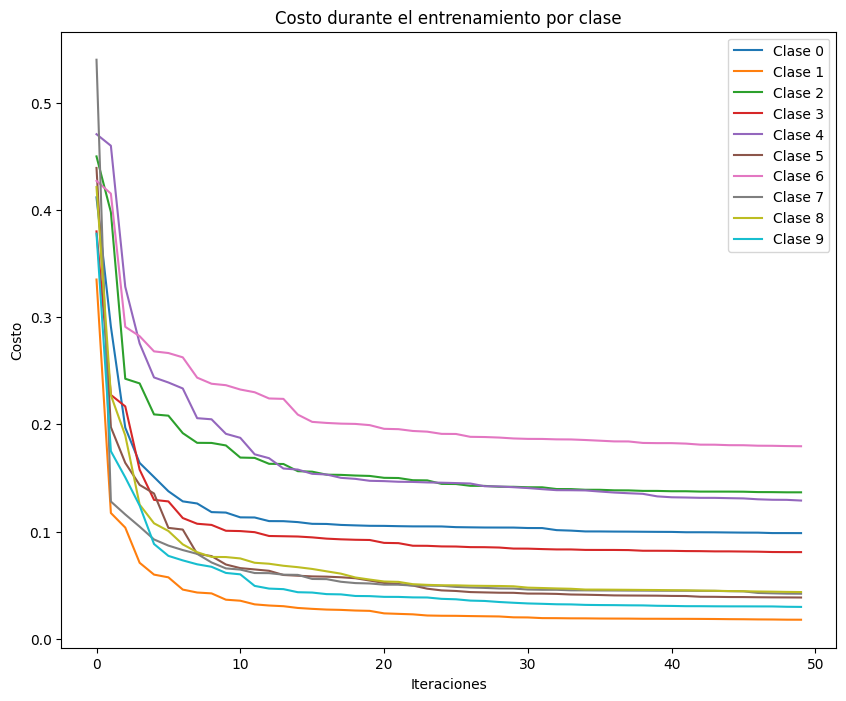

In [ ]:
print(all_theta.shape)
print(all_theta[0])
# Grafica el costo
plt.figure(figsize=(10, 8))
for i, cost_history in enumerate(all_cost_history):
    plt.plot(cost_history, label=f'Clase {i}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo durante el entrenamiento por clase')
plt.legend()
plt.show()

<a id="section3"></a>
#### 1.4.1 Prediccion One-vs-all

Después de entrenar el clasificador de one-vs-all, se puede usarlo para predecir el dígito contenido en una imagen determinada. Para cada entrada, debe calcular la "probabilidad" de que pertenezca a cada clase utilizando los clasificadores de regresión logística entrenados. La función de predicción one-vs-all seleccionará la clase para la cual el clasificador de regresión logística correspondiente genera la probabilidad más alta y devolverá la etiqueta de clase (0, 1, ..., K-1) como la predicción para el ejemplo de entrada.

El objetivo de esta función es utilizar los parámetros entrenados de varios clasificadores de regresión logística (all_theta) para predecir la clase de cada ejemplo en un nuevo conjunto de datos X.

### Parametros
* **all_theta**
  * Una matriz de tamaño (K x n+1) que contiene los parámetros theta entrenados para cada uno de los K clasificadores de regresión logística.
  * Cada fila de all_theta representa los parámetros theta para un clasificador correspondiente a una clase específica.

**Calculo de predicciones**
```
p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
```
* `sigmoid(...)`: Aplica la función sigmoide a cada valor en la matriz resultante para obtener probabilidades entre 0 y 1. Esto representa la probabilidad de que cada ejemplo pertenezca a cada clase.

* `np.argmax(..., axis=1)`: Selecciona el índice de la columna con el valor más alto (probabilidad más alta) para cada fila (ejemplo). Esto da como resultado un vector p de tamaño (m,), donde cada entrada es la clase predicha (índice de la clase con la mayor probabilidad).

In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

Una vez que haya terminado, se llama a la función `predictOneVsAll` usando el valor aprendido de $\theta$. Debería apreciarse que la precisión del conjunto de entrenamiento es de aproximadamente 95,1% (es decir, clasifica correctamente el 95,1% de los ejemplos del conjunto de entrenamiento).

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/one vs all/fashion-mnist_test.csv'
df = pd.read_csv(file_path)

# Separar las características (X) y los labels (Y)
X_test = df.iloc[:, 1:].values  # Todas las columnas excepto la primera
Y_test = df.iloc[:, 0].values   # Solo la primera columna (label)

X_test = X_test / 255.0  # Suponiendo que los valores de los píxeles están en el rango de 0 a 255

# Confirmar las dimensiones de X e Y
print(f"Dimensiones de X: {X_test.shape}")
print(f"Dimensiones de Y: {Y_test.shape}")

Dimensiones de X: (10000, 784)
Dimensiones de Y: (10000,)


```
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred == Y_test) * 100))
```
* `pred == Y_test:` Crea un array booleano donde cada elemento es True si la predicción pred coincide con la etiqueta real Y_test, y False en caso contrario.
* `np.mean(pred == Y_test)`: Calcula la proporción de predicciones correctas dividiendo el número de True entre el total de elementos.
* *100: Convierte esta proporción en un porcentaje.
* print(...): Imprime la precisión del modelo en el conjunto de entrenamiento en un formato de dos decimales.

(10000, 784)
Precisión del conjunto de prueba: 85.59%
Forma de los ejemplos seleccionados para visualización: (100, 784)
Forma de los datos seleccionados con término de intercepción: (100, 785)
Predicciones: [4 6 8 5 3 3 8 2 3 6 9 7 4 9 3 1 9 9 8 7 9 9 0 3 3 8 9 5 7 9 0 2 8 6 3 9 8
 2 1 0 6 1 2 7 0 2 4 1 1 0 9 7 3 4 0 6 3 6 9 7 7 6 2 1 6 2 5 9 2 6 2 9 1 1
 8 4 4 3 3 1 9 0 5 5 8 1 4 9 1 9 4 8 9 5 7 7 4 2 7 4]
Valores reales: [2 6 8 5 3 3 8 2 3 6 9 7 4 9 3 1 9 9 8 7 9 9 0 6 3 8 9 5 7 9 0 2 0 4 3 9 8
 2 1 0 6 1 2 7 0 2 0 1 3 0 9 7 3 2 6 6 3 6 9 7 7 6 2 1 6 2 5 9 4 4 2 9 1 1
 8 4 4 3 3 1 9 6 5 5 8 1 2 9 1 9 4 8 9 5 7 7 4 4 7 4]


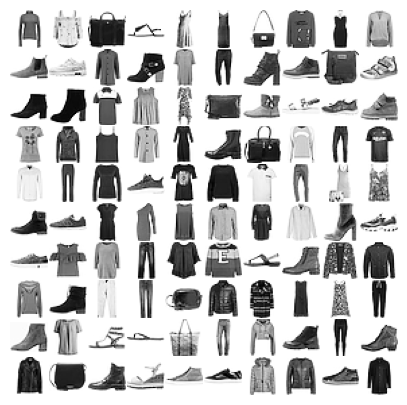

In [ ]:
# Imprimir la forma del conjunto de datos de prueba
print(X_test.shape)

# Realizar predicciones en el conjunto de datos de prueba
pred = predictOneVsAll(all_theta, X_test)

# Calcular y mostrar la precisión del conjunto de entrenamiento
print('Precisión del conjunto de prueba: {:.2f}%'.format(np.mean(pred == Y_test) * 100))

# Obtener el tamaño del conjunto de prueba
m_test = Y_test.size

# Seleccionar aleatoriamente 100 índices de datos del conjunto de prueba para mostrar
rand_indices = np.random.choice(m_test, 100, replace=False)
XPrueba = X_test[rand_indices, :]  # Seleccionar ejemplos aleatorios
XPruebaV = XPrueba.copy()  # Copiar los ejemplos para visualización

# Imprimir la forma de los datos seleccionados
print("Forma de los ejemplos seleccionados para visualización:", XPrueba.shape)

# Agregar el término de intercepción a los datos seleccionados
XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
print("Forma de los datos seleccionados con término de intercepción:", XPrueba.shape)

# Calcular las predicciones para los ejemplos seleccionados
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)

# Imprimir predicciones vs valores reales
print("Predicciones:", p)
print("Valores reales:", Y_test[rand_indices])

# Visualizar las imágenes correspondientes a los ejemplos seleccionados
displayData(XPruebaV)
